In [1]:
import stream as st
st.__version__
import pandas as pd

/opt/conda/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


In [2]:
#import stream_atac
import os
path = os.getcwd()
os.chdir('/PATH_TO_DIR/')
print(path)

/data/Miyazaki/publication/stream/abT/integrate


In [3]:
adata = st.read(file_name='./stream_result.hs/zscores.tsv.gz', workdir='stream_result.hs')

Saving results in: stream_result.hs


In [4]:
adata

AnnData object with n_obs × n_vars = 5714 × 386 
    uns: 'workdir'

In [5]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [6]:
st.add_cell_labels(adata,file_name='/PATH_TO_DIR/label.tsv')
st.add_cell_colors(adata,file_name='/PATH_TO_DIR/col.tsv')

In [7]:
adata.shape

(5714, 386)

using all the features ...
60 PCs are selected


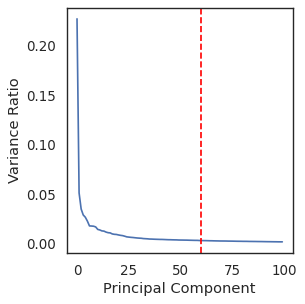

In [8]:
st.select_top_principal_components(adata,n_pc=60,first_pc=True)

In [9]:
st.dimension_reduction(adata,method='se',feature='top_pcs',n_components=5,n_neighbors=30,n_jobs=4)

feature top_pcs is being used ...
4 cpus are being used ...


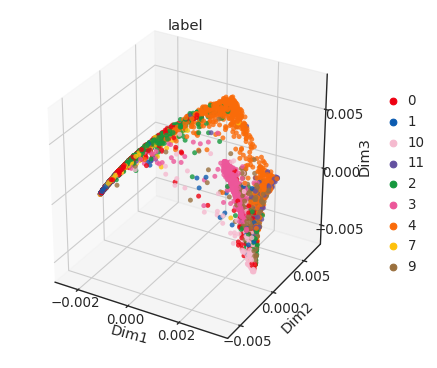

In [10]:
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=False,show_text=False,plotly=False)

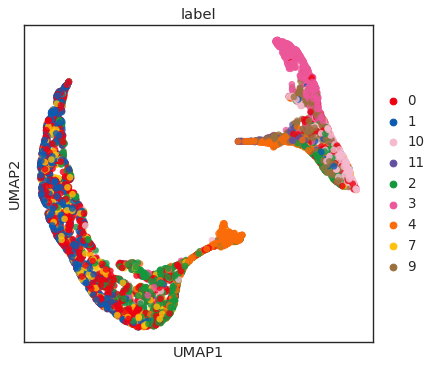

In [11]:
st.plot_visualization_2D(adata,n_neighbors=100,color=['label'],use_precomputed=False)

In [12]:
st.seed_elastic_principal_graph(adata,n_clusters=10,use_vis=True)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


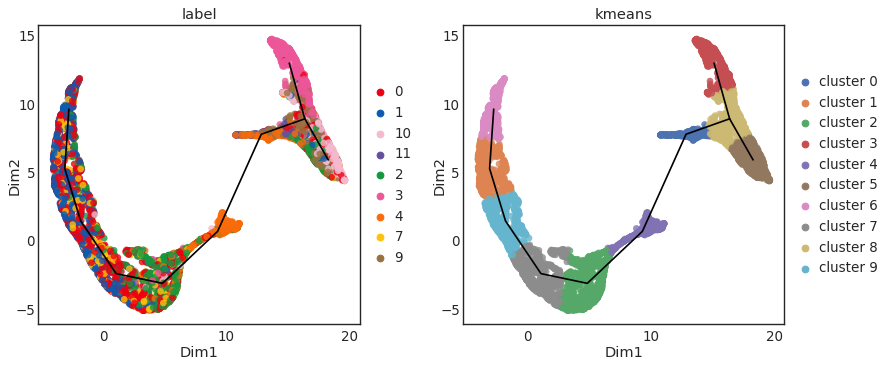

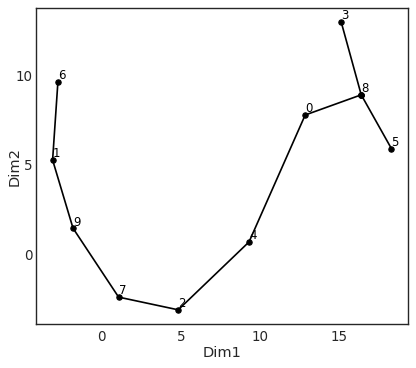

In [13]:
st.plot_dimension_reduction(adata,color=['label','kmeans'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

In [14]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.01)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 5714 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
1.098
	
50
	
49
	
46
	
1
	
0
	
0
	
0.545
	
0.4778
	
0.9942
	
0.9949
	
0.4781
	
0.07518
	
3.759
	
187.9
	
0


18.034 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


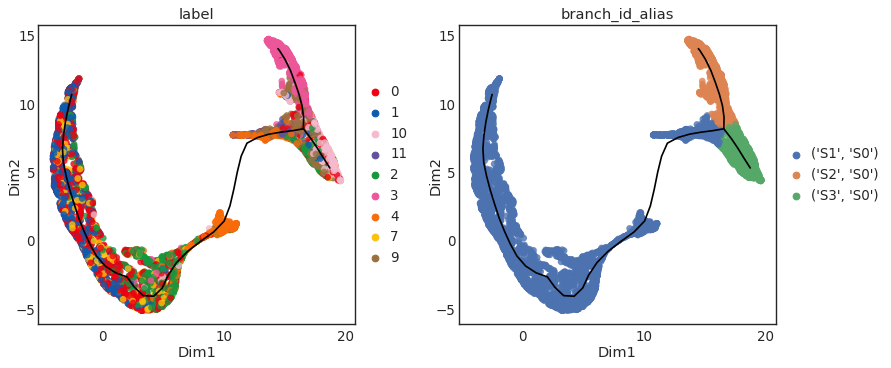

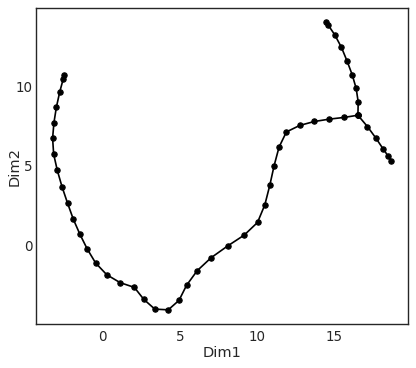

In [15]:
st.plot_dimension_reduction(adata,color=['label','branch_id_alias'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


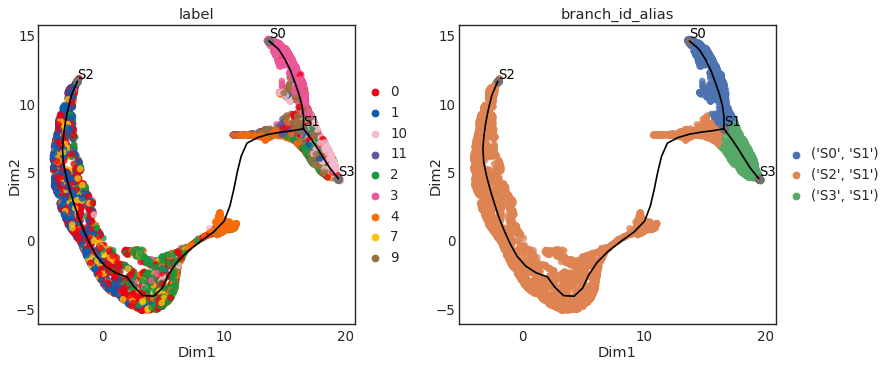

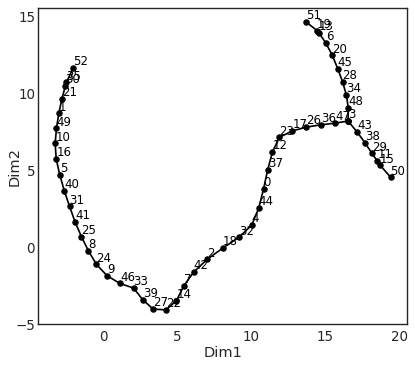

In [16]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label','branch_id_alias'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

Importing precomputed umap visualization ...


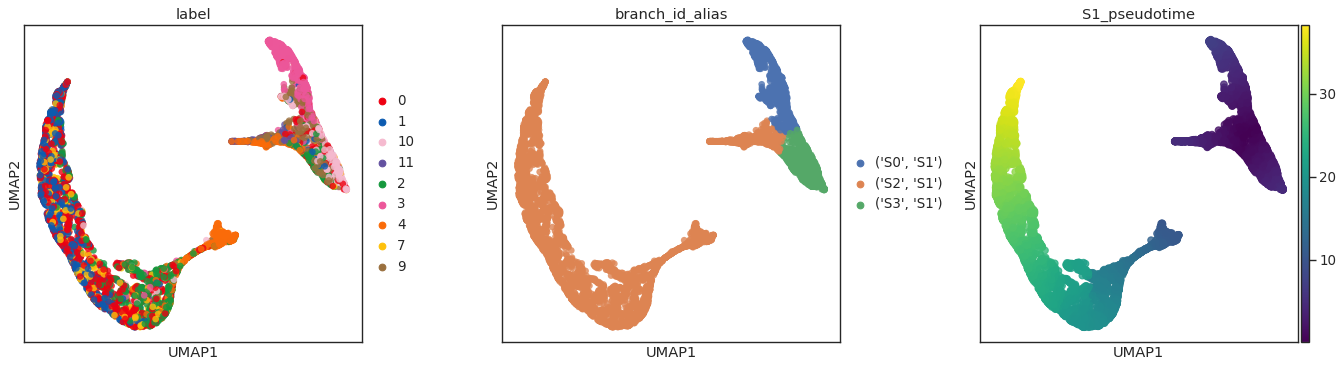

In [17]:
st.plot_visualization_2D(adata,n_neighbors=100,color=['label','branch_id_alias','S1_pseudotime'])

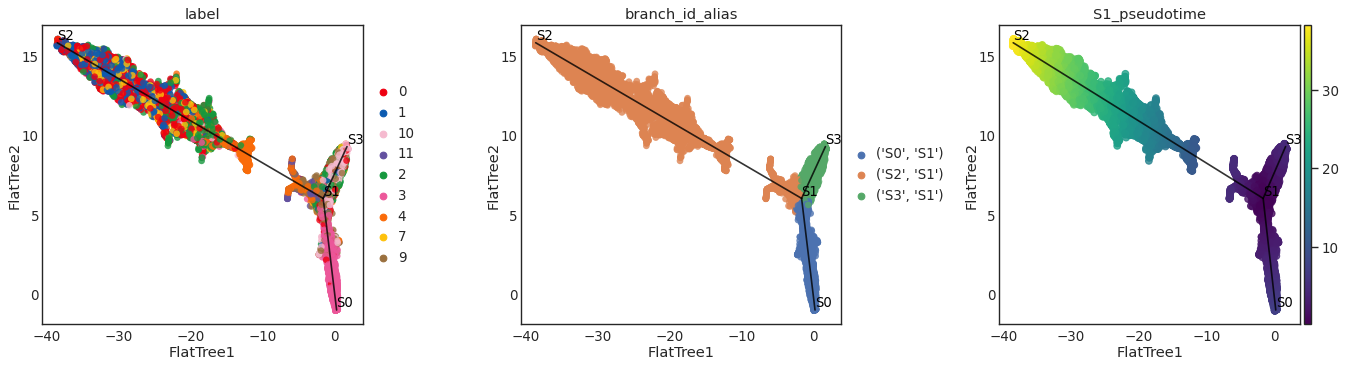

In [18]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S1_pseudotime'],
                  dist_scale=1,show_graph=True,show_text=True)

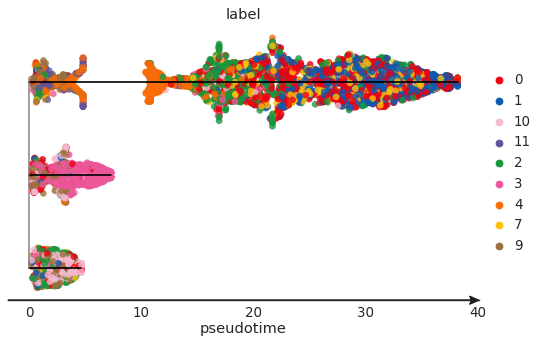

In [25]:
st.add_cell_colors(adata,file_name='../col.tsv')
st.plot_stream_sc(adata,root='S1',color=['label'],
                  dist_scale=0.5,show_graph=True,show_text=False,save_fig=True,fig_path='./stream_result.hs/',fig_format='pdf')
st.plot_stream_sc(adata,root='S1',color=['label'],
                  dist_scale=0.5,show_graph=True,show_text=False)

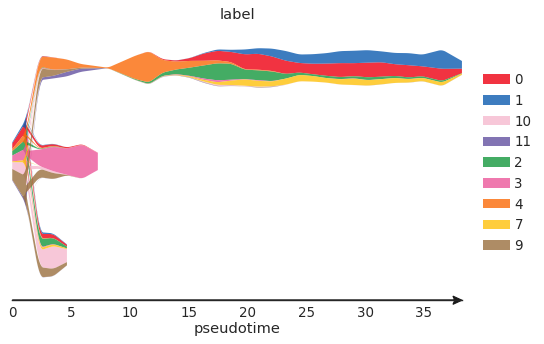

In [26]:
st.plot_stream(adata,root='S1',color=['label'],save_fig=True,fig_path='./stream_result.hs/',fig_format='pdf')
st.plot_stream(adata,root='S1',color=['label'])

In [ ]:
st.add_cell_labels(adata,file_name='./genotype.tsv')
st.plot_stream(adata,root='S1',color=['label'],save_fig=True,fig_path='./stream_result.hs/',fig_format='pdf')
st.plot_stream(adata,root='S1',color=['label'])

In [25]:
st.detect_leaf_markers(adata,root='S1')

Scanning all features ...
Filtering out markers that are expressed in less than 5 cells ...
1 cpus are being used ...
386 markers are being scanned ...


In [26]:
adata.uns['leaf_markers_all']

,zscore,H_statistic,H_pvalue,S1S2_pvalue,S1S0_pvalue,S1S3_pvalue
MA0691.1_TFAP4,1.41421,2367.09,0,1,0,0
MA0698.1_ZBTB18,1.41421,2699.32,0,1,0,0
MA0665.1_MSC,1.41421,2528.09,0,1,0,0
MA0091.1_TAL1::TCF3,1.41407,2609.14,0,1,0,0
MA0690.1_TBX21,1.41407,1600.46,0,0,1,7.54466e-245
...,...,...,...,...,...,...
MA0737.1_GLIS3,1.41333,20.5856,3.38769e-05,1,0.000833305,0.000833305
MA0767.1_GCM2,1.39622,19.5987,5.54874e-05,7.64565e-05,0.000161774,1
MA0755.1_CUX2,1.35816,19.4396,6.0083e-05,1,0.00638265,0.000419567
MA0775.1_MEIS3,1.41417,17.208,0.000183371,0.000107624,1,0.00753001


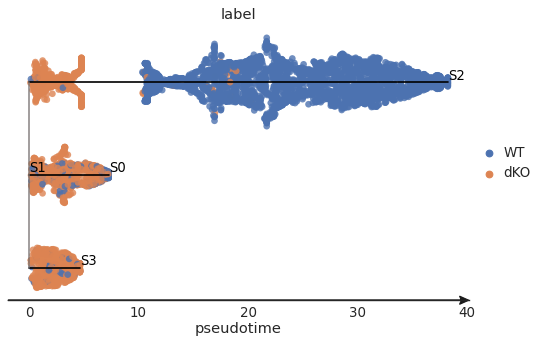

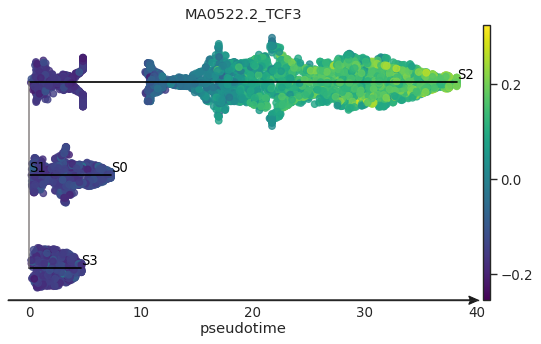

In [28]:
st.plot_stream_sc(adata,root='S1',color=['label','MA0522.2_TCF3'],
                  dist_scale=0.5,show_graph=True,show_text=True)

In [35]:
st.write(adata,file_name='stream_atac_motifs.pkl')

In [36]:
adata.obs.to_csv('stream_result.hs/adata.obs.csv')
motifs=adata.uns['leaf_markers_all']
motifs.to_csv('stream_result.hs/adata.motifs.csv')

In [37]:
adata=pd.read_pickle('stream_result.hs/stream_atac_motifs.pkl')